# Loading packages

In [197]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [198]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

id  default     legal_form  zip_code  sector  year_inc  count_emp  \
0  C_405        0  GmbH & Co. KG     12359   46730      1900        NaN   
1  C_292        0  GmbH & Co. KG     10719   70101      1976        NaN   
2  C_746        0           GmbH     13353   87100      1962      323.0   
3  C_838        0             AG     12529   68320      1972        1.0   
4  C_495        0    Einzelfirma     12165   47730      1908        NaN   
5  C_494        0           GmbH     13055   68201      1990      415.0   
6  C_300        0           GmbH     10969   68200      1991        2.0   
7  C_453        0           GmbH     16792   78100      1991        NaN   
8  C_924        0           GmbH     13125   86101      1991      283.0   
9  C_976        0           GmbH     12681   71122      1999        NaN   

  type_pl         sales  gross_performance  ...  bonds_payables_lt  \
0     GKV  1.068738e+08       1.068738e+08  ...                NaN   
1     GKV  1.393869e+06       1.407889e+06  ...                NaN   
2     GKV  3.864034e+06       7.597353e+05  ...                NaN   
3     GKV  4.384786e+06       4.405058e+06  ...                NaN   
4     GKV  1.104478e+08       1.104478e+08  ...                NaN   
5     GKV  4.518042e+04       4.518042e+04  ...                NaN   
6     GKV  1.508435e+08       1.479894e+08  ...                NaN   
7     GKV  2.843420e+08       2.843420e+08  ...                NaN   
8     GKV  9.811591e+06       9.681040e+06  ...                NaN   
9     GKV  1.384595e+05       1.384595e+05  ...                NaN   

   total_equity  current_assets  monetary_current_assets         cash  \
0  3.224471e+07    3.783199e+07             1.711147e+07  10297047.50   
1  4.508026e+06    4.669179e+06             9.278377e+05    926383.75   
2  5.164048e+04    2.810119e+07             1.111696e+07   9146283.79   
3  1.182011e+07    8.238474e+06             7.519183e+06   6890565.23   
4  4.547445e+08    3.546565e+07             8.545184e+06   5036615.09   
5  7.953387e+04    8.484770e+04             8.061511e+04     75679.79   
6  6.657375e+08    8.479909e+07             3.142807e+07  11542490.91   
7  2.883814e+09    4.229090e+08             4.312550e+08  21696000.00   
8  2.032968e+07    7.366730e+06             5.421665e+06    322573.88   
9  1.552805e+06    4.966969e+05             4.500943e+04     35726.57   

   trade_receivables_st  trade_receivables_lt  cf_operating  cf_investment  \
0                   NaN                   NaN  6.986094e+06  -1.112342e+06   
1                   NaN                   NaN -4.343980e+06   1.174427e+06   
2             617816.28                   NaN  9.548544e+06  -7.536444e+06   
3             319848.26                   NaN  1.715799e+06  -6.561222e+05   
4             516646.73                   NaN  1.301809e+08  -1.419776e+08   
5                   NaN                   NaN  1.800497e+04  -3.787100e+02   
6             326731.07                8000.0  4.007555e+07  -8.337054e+06   
7             448000.00                   NaN  5.861770e+08  -7.339750e+08   
8             372298.68                   NaN  4.369386e+05  -1.879056e+06   
9                   NaN                   NaN  1.947540e+05   3.318306e+05   

   cf_financing  
0   -7520392.09  
1    1128108.08  
2     -22026.07  
3    -169655.66  
4   12567030.80  
5          0.00  
6  -34594274.52  
7  -95826000.00  
8  -13729379.17  
9    -798859.83  

[10 rows x 40 columns]

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [199]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [200]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [201]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [202]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

Variable coding and transforming variables

In [203]:
# drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [204]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [205]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile  (9.999, 13.0]  (13.0, 16.0]  (16.0, 20.0]  (20.0, 23.0]  \
default                                                                 
0                        69            61            75            78   
1                         5             1             3             6   

age_quartile  (23.0, 25.0]  (25.0, 29.0]  (29.0, 32.0]  (32.0, 42.6]  \
default                                                                
0                       36            67            63            54   
1                        4             0             7             5   

age_quartile  (42.6, 66.0]  (66.0, 158.33]  
default                                     
0                       65              62  
1                        3               4

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [206]:
# replace NaN's by 0.5% quantil
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))

# calculate margin and winsorize outliers
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.025])

# same procedure for test
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.025])

### Equity Ratio 

\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [207]:
# data cleaning and ratio calculation
np.where(df_train['total_equity'] > 1, df_train['total_equity'], 0)
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = df_train['total_assets'] - df_train['total_liabilities']
df_train['equity_ratio'] = df_train['total_equity']/df_train['total_assets']

# same procedure for test
np.where(df_test['total_equity'] > 1, df_test['total_equity'], 0)
df_test.loc[df_test.total_equity.isnull(), 'total_equity'] = df_test['total_assets'] - df_test['total_liabilities']
df_test['equity_ratio'] = df_test['total_equity']/df_test['total_assets']

### Quick ratio

In [208]:
# replace NaNs for cash by monetary current assets
df_train.loc[df_train['cash'].isnull(), 'cash'] = df_train['monetary_current_assets']

# quick ratio
df_train['quick_ratio'] = df_train['cash']/df_train['total_liabilities_st']
df_train['quick_ratio'] = sci.stats.mstats.winsorize(df_train['quick_ratio'], limits =[0.01, 0.1])

# same procedure for test
df_test.loc[df_test['cash'].isnull(), 'cash'] = df_test['monetary_current_assets']
df_test['quick_ratio'] = df_test['cash']/df_test['total_liabilities_st']
df_test['quick_ratio'] = sci.stats.mstats.winsorize(df_test['quick_ratio'], limits =[0.01, 0.1])

### Interest Coverage Ratio

\begin{equation*}
Interest\ Coverage\ Ratio = \frac{Operating\ Income}{Interest\ Expenses}
\end{equation*}

In [209]:
# replace NaNs for oth interst exp by balance sheet operations
df_train.loc[df_train['fin_result'].isnull(), 'fin_result'] = df_train['total_result'] - df_train['earn_from_op']
df_train.loc[df_train['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_train['oth_interest_inc'] - df_train['fin_result']
df_train['oth_interest_exp'] = df_train['oth_interest_exp'].replace(np.nan, df_train['fin_result'])

# data cleaning, ratio calculation and winsorizing of outliers
df_train['icr_ratio'] = df_train['earn_from_op']/df_train['oth_interest_exp']
df_train['icr_ratio'] = sci.stats.mstats.winsorize(df_train['icr_ratio'], limits =[0.05, 0.16])

# same procedure for test
df_test.loc[df_test['fin_result'].isnull(), 'fin_result'] = df_test['total_result'] - df_test['earn_from_op']
df_test.loc[df_test['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_test['oth_interest_inc'] - df_test['fin_result']
df_test['oth_interest_exp'] = df_test['oth_interest_exp'].replace(np.nan, df_test['fin_result'])
df_test['icr_ratio'] = df_train['earn_from_op']/df_test['oth_interest_exp']
df_test['icr_ratio'] = sci.stats.mstats.winsorize(df_test['icr_ratio'], limits =[0.05, 0.16])

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [210]:
# ratio calculation and winsorizing of outliers
df_train['roa'] = df_train['result_from_ord_bus']/df_train['total_assets']
df_train['roa'] = sci.stats.mstats.winsorize(df_train['roa'], limits =[0.03, 0.05])

# same procedure for test
df_test['roa'] = df_test['result_from_ord_bus']/df_test['total_assets']
df_test['roa'] = sci.stats.mstats.winsorize(df_test['roa'], limits =[0.03, 0.05])

### Working Capital Ratio

In [211]:
# ratio calculation and winsorizing of outliers
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.1])

# same procedure for test
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.01])

In [212]:
# # Dept-to-equity kick out
# df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
# df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])

# df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

In [213]:
# # Ebit margin kick out
# df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
# df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])

# df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
# df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

In [214]:
# # neue ratio kick out
# df_train['neu'] = df_train['earn_from_op']/df_train['result_from_ord_bus']
# df_train['neu'] = sci.stats.mstats.winsorize(df_train['neu'], limits =[0.1, 0.1])
# plt.boxplot(df_train['neu'])
# plt.show()

### Boxplots for Ratios

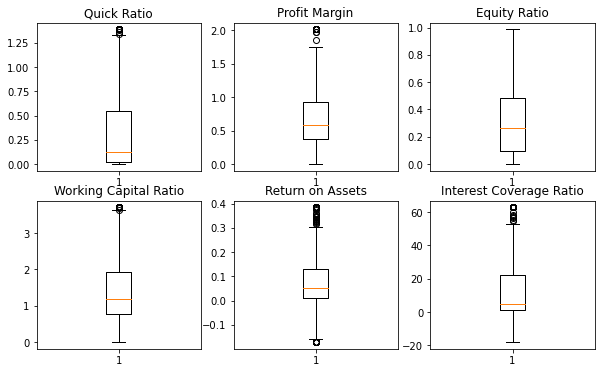

In [215]:
f, ax = plt.subplots(2, 3, figsize=(10, 6))

ax[0,0].boxplot(df_train['quick_ratio'])
ax[0,0].set_title('Quick Ratio')
ax[0,1].boxplot(df_train['profit_margin'])
ax[0,1].set_title('Profit Margin')
ax[0,2].boxplot(df_train['equity_ratio'])
ax[0,2].set_title('Equity Ratio')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('Working Capital Ratio')
ax[1,1].boxplot(df_train['roa'])
ax[1,1].set_title('Return on Assets')
ax[1,2].boxplot(df_train['icr_ratio'])
ax[1,2].set_title('Interest Coverage Ratio')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [216]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [217]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

P-Value  NAs
equity_ratio             0.000102    0
quick_ratio              0.002836    0
icr_ratio                0.009120    0
wc_ratio                 0.025687    0
cash                     0.031590    0
year_inc                 0.055778    0
total_equity             0.080663    0
roa                      0.095320    0
gross_profit             0.157463    0
profit_margin            0.166417    0
cf_operating             0.242346    1
bank_liabilities_lt      0.245019  544
total_liabilities_lt     0.258998    0
zip_code                 0.260180    0
cf_investment            0.327959    1
total_assets             0.366245    0
result_from_ord_bus      0.421172    0
total_result             0.437999    0
bank_liabilities_mt      0.439548  482
total_liabilities        0.454982    0
oth_interest_exp         0.467391    0
earn_from_op             0.486441    0
total_liabilities_mt     0.509070    0
sales                    0.511471    0
gross_performance        0.580383    6
monetary_current_assets  0.594678    0
annual_profit            0.602697    0
oth_interest_inc         0.621381  126
total_liabilities_st     0.632565    0
current_assets           0.639518    0
bonds_payables_mt        0.699565  663
bank_liabilities_st      0.701179  351
age_num                  0.721892    0
fin_result               0.734789    0
trade_payables_mt        0.768325  647
trade_receivables_st     0.780828  354
sector                   0.840075    0
count_emp                0.903449  353
trade_payables_st        0.990767  142
cf_financing             0.999485    1

Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [218]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [219]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

Test statistic   P-Value  NAs
quick_ratio                      6586.0  0.000002    0
equity_ratio                     6800.0  0.000004    0
total_equity                     7142.0  0.000015    0
cash                             7196.0  0.000018    0
trade_receivables_lt             8295.0  0.000735  644
trade_payables_lt                8433.0  0.001102  664
bonds_payables_st                8470.0  0.001226  668
bonds_payables_lt                8470.0  0.001226  668
monetary_current_assets          8691.0  0.002271    0
bonds_payables_mt                8853.0  0.003492  663
result_from_ord_bus              8910.0  0.004045    0
total_result                     8979.0  0.004819    0
trade_payables_mt                9055.0  0.005822  647
cf_operating                     9085.0  0.006266    1
sales                            9176.0  0.007802    0
bank_liabilities_st              9216.0  0.008576  351
gross_performance                9239.0  0.009051    6
wc_ratio                         9258.0  0.009431    0
gross_profit                     9325.0  0.011038    0
total_assets                     9396.0  0.012953    0
earn_from_op                     9443.0  0.014374    0
icr_ratio                        9451.5  0.014473    0
current_assets                   9640.0  0.021879    0
cf_financing                     9775.5  0.028772    1
count_emp                       10013.5  0.045217  353
cf_investment                   10135.0  0.056123    1
annual_profit                   10207.0  0.063548    0
legal_form                      10591.5  0.064372    0
profit_margin                   10270.0  0.070632    0
bank_liabilities_lt             10291.0  0.073125  544
roa                             10292.0  0.073229    0
total_liabilities               10309.0  0.075313    0
total_liabilities_mt            10540.5  0.095418    0
total_liabilities_st            10491.0  0.100310    0
total_liabilities_lt            10889.0  0.148917    0
zip_code                        10800.5  0.155797    0
trade_receivables_st            10847.0  0.165617  354
fin_result                      11131.0  0.233977    0
age_quartile                    11192.5  0.249445    0
year_inc                        11210.0  0.255359    0
age_num                         11212.5  0.256055    0
type_pl                         11856.0  0.273852    0
oth_interest_exp                11446.0  0.325188    0
bank_liabilities_mt             11543.0  0.355998  482
oth_interest_inc                11557.0  0.360524  126
trade_payables_st               11729.0  0.417546  142
sector                          11774.5  0.432978    0

In [220]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

P-Value Univ. Logit  P-Value MannU  NAs
equity_ratio                        0.000102       0.000004    0
quick_ratio                         0.002836       0.000002    0
icr_ratio                           0.009120       0.014473    0
wc_ratio                            0.025687       0.009431    0
cash                                0.031590       0.000018    0
year_inc                            0.055778       0.255359    0
total_equity                        0.080663       0.000015    0
roa                                 0.095320       0.073229    0
gross_profit                        0.157463       0.011038    0
profit_margin                       0.166417       0.070632    0
cf_operating                        0.242346       0.006266    1
bank_liabilities_lt                 0.245019       0.073125  544
total_liabilities_lt                0.258998       0.148917    0
zip_code                            0.260180       0.155797    0
cf_investment                       0.327959       0.056123    1
total_assets                        0.366245       0.012953    0
result_from_ord_bus                 0.421172       0.004045    0
total_result                        0.437999       0.004819    0
bank_liabilities_mt                 0.439548       0.355998  482
total_liabilities                   0.454982       0.075313    0
oth_interest_exp                    0.467391       0.325188    0
earn_from_op                        0.486441       0.014374    0
total_liabilities_mt                0.509070       0.095418    0
sales                               0.511471       0.007802    0
gross_performance                   0.580383       0.009051    6
monetary_current_assets             0.594678       0.002271    0
annual_profit                       0.602697       0.063548    0
oth_interest_inc                    0.621381       0.360524  126
total_liabilities_st                0.632565       0.100310    0
current_assets                      0.639518       0.021879    0
bonds_payables_mt                   0.699565       0.003492  663
bank_liabilities_st                 0.701179       0.008576  351
age_num                             0.721892       0.256055    0
fin_result                          0.734789       0.233977    0
trade_payables_mt                   0.768325       0.005822  647
trade_receivables_st                0.780828       0.165617  354
sector                              0.840075       0.432978    0
count_emp                           0.903449       0.045217  353
trade_payables_st                   0.990767       0.417546  142
cf_financing                        0.999485       0.028772    1
trade_receivables_lt                     NaN       0.000735  644
trade_payables_lt                        NaN       0.001102  664
bonds_payables_st                        NaN       0.001226  668
bonds_payables_lt                        NaN       0.001226  668
legal_form                               NaN       0.064372    0
age_quartile                             NaN       0.249445    0
type_pl                                  NaN       0.273852    0

### Categorical Variables

In [221]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:
- Profit Margin
- Equity Ratio
- Qick Ratio
- Interest Coverage Ratio
- Return on Assets
(- Working Capital Ratio)

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [222]:
col_list = ['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio']
summary.loc[col_list,:]

P-Value Univ. Logit  P-Value MannU  NAs
profit_margin             0.166417       0.070632    0
equity_ratio              0.000102       0.000004    0
quick_ratio               0.002836       0.000002    0
icr_ratio                 0.009120       0.014473    0
roa                       0.095320       0.073229    0
wc_ratio                  0.025687       0.009431    0

## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [223]:
col_list = ['default', 'profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio']
df_train[col_list]

default  profit_margin  equity_ratio  quick_ratio  icr_ratio       roa  \
0          0       0.361114  7.385670e-01     1.386506  15.436676  0.180537   
1          0       1.104725  3.896983e-01     0.131683   8.723286  0.095967   
2          0       2.012151  9.370190e-04     1.083222  62.850328  0.001684   
3          0       2.012151  5.925318e-01     1.386506  62.850328  0.030412   
4          0       1.135876  4.174963e-01     0.014493   5.077795  0.040158   
..       ...            ...           ...          ...        ...       ...   
664        0       0.506472  1.823358e-01     0.003054   0.939698 -0.001518   
665        0       0.446851  3.418227e-01     0.276975  57.003692  0.173649   
666        0       1.000000 -3.086604e-17     0.003809   1.613677  0.013497   
667        0       1.049012 -1.273479e-16     0.049301   3.869858  0.063753   
668        0       0.258573  4.072948e-02     0.374316  17.665367  0.191823   

     wc_ratio  
0    3.710767  
1    0.663710  
2    3.328108  
3    3.193566  
4    0.102055  
..        ...  
664  0.835583  
665  1.213142  
666  0.041927  
667  0.615002  
668  1.006126  

[668 rows x 7 columns]

### Age

In [ ]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

In [ ]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

In [ ]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

In [ ]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

In [ ]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

In [ ]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

In [ ]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

In [ ]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

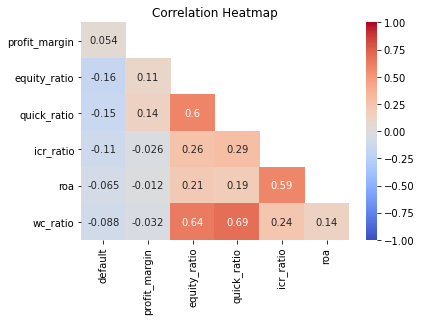

default  profit_margin  equity_ratio  quick_ratio  icr_ratio  \
profit_margin  0.053676       1.000000      0.107896     0.144117  -0.025846   
equity_ratio  -0.160258       0.107896      1.000000     0.600939   0.261021   
quick_ratio   -0.145124       0.144117      0.600939     1.000000   0.290439   
icr_ratio     -0.105542      -0.025846      0.261021     0.290439   1.000000   
roa           -0.064645      -0.011870      0.214094     0.194442   0.587653   
wc_ratio      -0.087933      -0.032352      0.639378     0.687871   0.241114   

                    roa  
profit_margin -0.011870  
equity_ratio   0.214094  
quick_ratio    0.194442  
icr_ratio      0.587653  
roa            1.000000  
wc_ratio       0.141487

In [225]:
data = df_train[col_list]
df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

## Univariate Ginis of our Variables of interest
Here we want to calculate the Gini coefficients, resulting from a logit model with only one variable of our interest. 

In [226]:
col_list = ['default', 'profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio']
df_train[col_list]

default  profit_margin  equity_ratio  quick_ratio  icr_ratio       roa  \
0          0       0.361114  7.385670e-01     1.386506  15.436676  0.180537   
1          0       1.104725  3.896983e-01     0.131683   8.723286  0.095967   
2          0       2.012151  9.370190e-04     1.083222  62.850328  0.001684   
3          0       2.012151  5.925318e-01     1.386506  62.850328  0.030412   
4          0       1.135876  4.174963e-01     0.014493   5.077795  0.040158   
..       ...            ...           ...          ...        ...       ...   
664        0       0.506472  1.823358e-01     0.003054   0.939698 -0.001518   
665        0       0.446851  3.418227e-01     0.276975  57.003692  0.173649   
666        0       1.000000 -3.086604e-17     0.003809   1.613677  0.013497   
667        0       1.049012 -1.273479e-16     0.049301   3.869858  0.063753   
668        0       0.258573  4.072948e-02     0.374316  17.665367  0.191823   

     wc_ratio  
0    3.710767  
1    0.663710  
2    3.328108  
3    3.193566  
4    0.102055  
..        ...  
664  0.835583  
665  1.213142  
666  0.041927  
667  0.615002  
668  1.006126  

[668 rows x 7 columns]

In [227]:
dictionary_univ_gini = dict()
for var in col_list[1:]:
    X = df_train[var]
    y = df_train["default"]
    X = sm.add_constant(X)

    random_numbers = np.random.randint(0,1000000,1000)

    for i in random_numbers:
        try:
            # Splitting data into training and testing sets.
            train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
            # The splited Logit Model
            mdl2split = sm.Logit(train_labels,train_features).fit()
            mdl2split.summary2()

            # Predict the test data
            predictions_split = mdl2split.predict(test_features)
            # Predict the training data
            predictions_split_train = mdl2split.predict(train_features)
            # Calculate the absolute errors
            errors = abs(predictions_split - test_labels)
    
            #AUC & Gini Graph + Calculations of splitted logit

            fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
            auc_split = metrics.auc(fpr_split, tpr_split) 

            # Predict the in sample (train) data for comparision
            fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
            auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
            #Store values in dictionary
            dictionary_univ_gini[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1,var
        
        except:
            continue

dictionary_univ_gini = pd.DataFrame.from_dict(dictionary_univ_gini,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample","Variable"])

;

Optimization terminated successfully.
         Current function value: 0.210958
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214425
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215073
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212735
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213837
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215156
  

Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211407
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215448
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214115
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214396
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212382
  

Optimization terminated successfully.
         Current function value: 0.215578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213214
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215243
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214439
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212875
  

Optimization terminated successfully.
         Current function value: 0.215587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215013
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211207
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211274
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212797
  

Optimization terminated successfully.
         Current function value: 0.213969
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213841
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214651
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213509
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215591
  

Optimization terminated successfully.
         Current function value: 0.214363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213309
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213311
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214977
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212464
  

Optimization terminated successfully.
         Current function value: 0.215494
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213683
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214536
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213121
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214032
  

Optimization terminated successfully.
         Current function value: 0.215430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215609
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215479
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214166
  

Optimization terminated successfully.
         Current function value: 0.211702
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215307
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213228
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213696
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210932
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214618
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214031
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215462
  

Optimization terminated successfully.
         Current function value: 0.212460
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214511
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214243
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214372
  

         Current function value: 0.215560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214633
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213158
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215391
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.212899
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215243
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212887
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213572
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212312
  

         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203037
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198997
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200278
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200196
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196420
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195364
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201946
         Iterations 8
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.202411
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.182899
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191559
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.198584
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200168
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.188354
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199231
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202727
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199854
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204033
  

         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200590
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202183
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196910
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198154
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197293
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201592
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201511
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195989
         Iterations 8
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.202425
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194407
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.187614
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205926
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204228
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204398
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198462
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203101
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189229
  

Optimization terminated successfully.
         Current function value: 0.205402
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201920
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198770
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201155
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197647
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201660
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199277
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201687
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204332
  

Optimization terminated successfully.
         Current function value: 0.204026
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202681
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197859
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198295
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199619
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203081
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206337
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199487
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199679
  

Optimization terminated successfully.
         Current function value: 0.198640
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199762
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200877
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193133
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199610
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195550
  

Optimization terminated successfully.
         Current function value: 0.203011
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203383
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192873
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202919
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204824
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202712
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197928
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196473
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201699
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200566
  

Optimization terminated successfully.
         Current function value: 0.182592
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196446
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192121
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200773
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196623
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204091
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205530
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201068
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.188365
  

Optimization terminated successfully.
         Current function value: 0.189192
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200687
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203673
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200933
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203168
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198946
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197894
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198155
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199474
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.187177
  

Optimization terminated successfully.
         Current function value: 0.202781
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206662
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198327
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204458
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207434
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199762
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201877
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200524
  

         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206108
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196104
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201787
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202728
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207218
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191762
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.192792
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205252
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.192020
         Iterations 10
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.189305
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191304
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201248
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203373
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188721
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188150
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200053
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200242
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.20335

Optimization terminated successfully.
         Current function value: 0.190745
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189979
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.203431
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203548
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202611
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199242
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203483
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.192544
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200232
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188555

Optimization terminated successfully.
         Current function value: 0.202242
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202800
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187436
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199488
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203361
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189905
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193289
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188286
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201315
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.20214

Optimization terminated successfully.
         Current function value: 0.191425
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192266
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202371
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203553
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200565
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.193032
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.190264
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.184718
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190728
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202

Optimization terminated successfully.
         Current function value: 0.204082
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203013
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203875
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191863
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201482
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203622
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200481
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203773
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199597
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.192942
 

Optimization terminated successfully.
         Current function value: 0.202722
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189345
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204243
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187434
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202923
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202811
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202721
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205021
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203796
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201134


Optimization terminated successfully.
         Current function value: 0.201851
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.188498
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.187975
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201386
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201422
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201104
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187155
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203523
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201218
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200714

Optimization terminated successfully.
         Current function value: 0.203519
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203406
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200805
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.187614
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.186483
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.203850
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202075
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.190749
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202514
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202582

Optimization terminated successfully.
         Current function value: 0.182759
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204063
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203649
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201258
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.182336
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200287
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.191335
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.190473
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200839
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.19225

Optimization terminated successfully.
         Current function value: 0.186682
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202955
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201949
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202403
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202891
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202275
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201896
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201915
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200083
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189193
 

Optimization terminated successfully.
         Current function value: 0.202951
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.192613
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188141
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200622
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200715
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201171
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200826
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.189503
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204683

Optimization terminated successfully.
         Current function value: 0.203826
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201685
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208485
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206830
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209161
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205684
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210774
  

Optimization terminated successfully.
         Current function value: 0.210527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206074
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210099
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208113
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203843
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208821
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211141
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207312
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207403
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209604
  

Optimization terminated successfully.
         Current function value: 0.209649
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210393
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211627
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208306
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206606
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207801
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208769
  

Optimization terminated successfully.
         Current function value: 0.210425
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208050
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206004
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206497
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208739
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210422
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207741
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209871
  

Optimization terminated successfully.
         Current function value: 0.211216
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209691
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204945
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210258
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205643
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206909
  

Optimization terminated successfully.
         Current function value: 0.209581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208247
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209572
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206380
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210428
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205878
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210323
  

Optimization terminated successfully.
         Current function value: 0.209043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209326
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207698
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207675
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211509
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207594
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209894
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209034
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209048
  

Optimization terminated successfully.
         Current function value: 0.211498
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209123
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208817
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205008
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210961
  

Optimization terminated successfully.
         Current function value: 0.209668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205958
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206884
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208519
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210522
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207463
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205997
  

Optimization terminated successfully.
         Current function value: 0.210780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206405
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211248
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210028
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.203784
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210108
  

Optimization terminated successfully.
         Current function value: 0.208737
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206544
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210229
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208031
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204416
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208138
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208223
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211299
  

Optimization terminated successfully.
         Current function value: 0.209762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207696
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207906
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205883
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208761
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208246
  

Optimization terminated successfully.
         Current function value: 0.212823
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212427
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209067
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209686
  

Optimization terminated successfully.
         Current function value: 0.213728
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215057
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215340
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212175
  

Optimization terminated successfully.
         Current function value: 0.213776
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211544
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214996
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210637
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213863
  

Optimization terminated successfully.
         Current function value: 0.213901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214059
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214278
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213738
  

Optimization terminated successfully.
         Current function value: 0.214688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213879
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211252
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211016
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210950
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215133
  

Optimization terminated successfully.
         Current function value: 0.214677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213247
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211343
  

Optimization terminated successfully.
         Current function value: 0.214819
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212888
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214940
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211621
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212107
  

Optimization terminated successfully.
         Current function value: 0.215335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214621
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214337
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213917
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212869
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212883
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210493
  

Optimization terminated successfully.
         Current function value: 0.212825
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212954
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214156
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211979
  

Optimization terminated successfully.
         Current function value: 0.214676
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214525
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214838
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208603
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212876
  

         Current function value: 0.211770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214872
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211007
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213130
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214188
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215142
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.205711
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212772
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204876
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209562
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212077
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213882
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208190
  

Optimization terminated successfully.
         Current function value: 0.210054
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211124
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208981
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211114
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207153
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213836
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209596
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213059
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206729
  

Optimization terminated successfully.
         Current function value: 0.205959
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212125
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209817
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208568
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210925
  

Optimization terminated successfully.
         Current function value: 0.215089
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210184
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210440
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205917
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213132
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213617
  

Optimization terminated successfully.
         Current function value: 0.211333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213863
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201000
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209245
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210781
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210795
  

Optimization terminated successfully.
         Current function value: 0.211084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208758
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207453
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209019
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206577
  

Optimization terminated successfully.
         Current function value: 0.212432
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206757
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209029
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214411
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213410
  

Optimization terminated successfully.
         Current function value: 0.209968
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210164
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211002
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210089
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210732
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210171
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211660
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206978
  

Optimization terminated successfully.
         Current function value: 0.212159
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214153
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211218
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204685
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213981
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209584
  

Optimization terminated successfully.
         Current function value: 0.210829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209734
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209299
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213316
  

Optimization terminated successfully.
         Current function value: 0.209286
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204502
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209651
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210882
  

Optimization terminated successfully.
         Current function value: 0.214446
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209165
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206646
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212878
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213577
  

''

In [228]:
for i in col_list[1:]:
    print("Mean Gini out of sample with variable:", i, 
          dictionary_univ_gini["Gini out of sample"][dictionary_univ_gini["Variable"]==i].mean())
    

Mean Gini out of sample with variable: profit_margin 0.10187026642116112
Mean Gini out of sample with variable: equity_ratio 0.43772904413736347
Mean Gini out of sample with variable: quick_ratio 0.45127319829310414
Mean Gini out of sample with variable: icr_ratio 0.2108966453617294
Mean Gini out of sample with variable: roa 0.1415010564237089
Mean Gini out of sample with variable: wc_ratio 0.2247454555146863


In [ ]:
# # Gini with only cash and wc ratio
# var = ["cash","wc_ratio"]
# dictionary_logit_two_vars = dict()
# X = df_train[var]
# y = df_train["default"]
# X = sm.add_constant(X)

# random_numbers = np.random.randint(0,1000000,1000)

# for i in random_numbers:
#     try:
#         # Splitting data into training and testing sets.
#         train_features, test_features, train_labels, test_labels = train_test_split(X, 
#                                                                                 y, test_size = 0.33, 
#                                                                                 random_state = i, 
#                                                                                 stratify = y)
#         # The splited Logit Model
#         mdl2split = sm.Logit(train_labels,train_features).fit()
#         mdl2split.summary2()

#         # Predict the test data
#         predictions_split = mdl2split.predict(test_features)
#         # Predict the training data
#         predictions_split_train = mdl2split.predict(train_features)
#         # Calculate the absolute errors
#         errors = abs(predictions_split - test_labels)
    
#         #AUC & Gini Graph + Calculations of splitted logit

#         fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
#         auc_split = metrics.auc(fpr_split, tpr_split) 

#         # Predict the in sample (train) data for comparision
#         fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
#         auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
#         #Store values in dictionary
#         dictionary_logit_two_vars[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
#     except:
#         continue

# dictionary_logit_two_vars = pd.DataFrame.from_dict(dictionary_logit_two_vars,orient="index",
#                        columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])


In [ ]:
dictionary_logit_two_vars.mean() #gini does not get better

# Our Logit Regression

Die Variablen die funktionieren sind: 'profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa', 'wc_ratio'

In [229]:
mdl1 = sm.Logit.from_formula('default ~ profit_margin + equity_ratio + quick_ratio + icr_ratio + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: default          AIC:              266.4915  
Date:               2021-01-12 11:52 BIC:              293.5172  
No. Observations:   668              Log-Likelihood:   -127.25   
Df Model:           5                LL-Null:          -145.83   
Df Residuals:       662              LLR p-value:      5.5272e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.1813   0.3914 -5.5734 0.0000 -2.9484 -1.4142
profit_margin      0.7395   0.4271  1.7314 0.0834 -0.0976  1.5766
equity_ratio      -2.5850   1.0597 -2.4394 0.0147 -4.6620 -0.5081
quick_ratio       -2.5512   1.1788 -

In [230]:
y = df_train["default"]
X = df_train[['profit_margin', 'equity_ratio', 'quick_ratio', 'icr_ratio', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.190488
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: default          AIC:              266.4915  
Date:               2021-01-12 11:52 BIC:              293.5172  
No. Observations:   668              Log-Likelihood:   -127.25   
Df Model:           5                LL-Null:          -145.83   
Df Residuals:       662              LLR p-value:      5.5272e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.1813   0.3914 -5.5734 0.0000 -2.9484 -1.4142
profit_margin      0.7395   0.4271  1.7314 0.0834 -0.0976  1.5766
equity_ratio      -2.5850   1.0597 -2.4394 0.0147 -4.6620 -0.5081
quick_ratio       -2.5512   1.1788 -2.1642 0.0304 -4.8616 -0.2408
icr_ratio         -0.0249   0.0150 -1.6641 0.0961 -0.0542  0.0044
roa                1.3299   1.9124  0.6954 0.4868 -2.4183  5.0781
=================================================================

"""

In [231]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

default  estimated PD in %
544        0              30.81
209        0              27.73
13         0              24.38
351        0              23.54
375        1              20.49
..       ...                ...
522        1               0.01
468        0               0.01
462        0               0.01
258        0               0.01
318        0               0.01

[668 rows x 2 columns]

In [232]:
s[s["default"] == 1]

default  estimated PD in %
32         1               8.43
43         1              14.95
69         1              10.63
104        1              15.55
114        1              10.25
120        1               6.95
128        1              12.04
139        1              19.46
150        1              17.02
198        1              18.27
212        1              19.63
218        1               8.38
226        1               7.89
236        1              14.96
250        1               7.44
251        1               7.36
296        1               9.23
305        1              11.38
313        1              13.30
341        1              12.43
346        1               5.52
375        1              20.49
389        1              15.40
406        1              11.60
419        1              17.75
427        1              12.80
477        1               7.39
479        1              13.19
495        1               9.87
521        1              11.63
522        1               0.01
543        1               2.54
564        1               8.59
566        1              13.93
568        1               8.96
636        1               6.67
649        1               6.26
662        1              10.22

In [233]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.187331
         Iterations 9
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.7331349206349207
GINI (LY):  0.4662698412698414


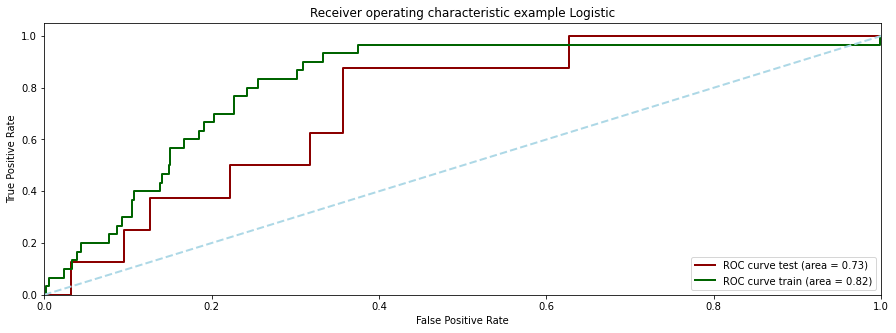

In [234]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.806265664160401
GINI L1:  0.612531328320802
AUC L2:   0.806265664160401
GINI L2:  0.612531328320802
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.7331349206349207
GINI Test Sample:  0.4662698412698414


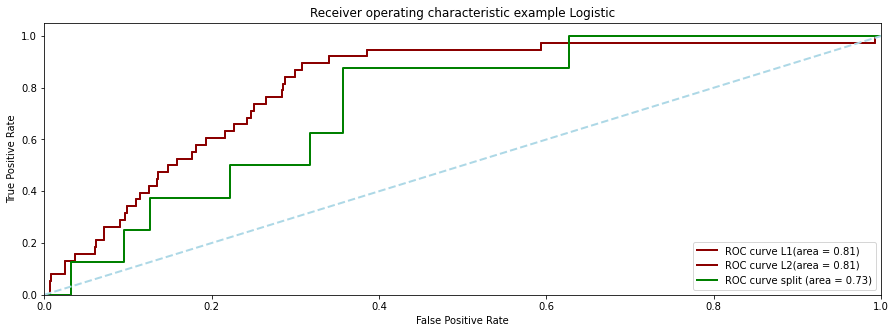

In [235]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [ ]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

;

In [ ]:
dictionary_random_test.head()

In [ ]:
dictionary_random_test.describe()

In [ ]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

In [ ]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

In [ ]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

In [ ]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [ ]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

# Coming to the Test Sample

In [ ]:
df_test

In [ ]:
X = df_test[['cash_coverage', 'profit_margin', 'equity_ratio', 'wc_ratio', 'roa', 'ocf_ratio']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

X.loc['C_712','ocf_ratio'] = 0
X.loc['C_712']

In [ ]:
prediction = pd.DataFrame(mdl1.predict(X))
x = round(prediction*100,2)

In [ ]:
x.describe()

In [ ]:
x.sort_values(by=0,ascending=False)

In [ ]:
df_test.loc["C_712"] #der geht nicht

## Random Forest Export

In [ ]:
X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X.copy()
i_ndex = X.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [ ]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [ ]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

In [ ]:
y_RF.sort_values(by='Default',ascending=False)

In [ ]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

 # Export
 the Data as a CSV file for the Upload
  

In [ ]:
train_RF.to_csv("trained_RF-Approach.csv")

In [ ]:
 x.to_csv("trained_Logit-Approach.csv")